# PCA on the wine dataset using sklearn

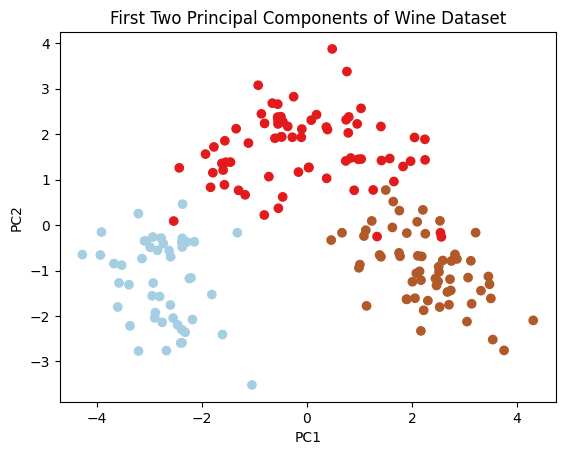

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load the wine dataset
X, y = datasets.load_wine(return_X_y=True)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired_r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First Two Principal Components of Wine Dataset')
plt.show()


# Explained variance ratio

The mathematical definition of the explained variance ratio is the fraction of the dataset's total variance that is captured by the principal components. The explained variance ratio is given by the ratio of eigenvalues of the covariance matrix to the sum of all eigenvalues.

$$\frac{\lambda_i}{\sum_{i=1}^{k} \lambda_i}$$

where $\lambda_i$ is the $i^{th}$ eigenvalue of the covariance matrix and $k$ is the number of principal components.

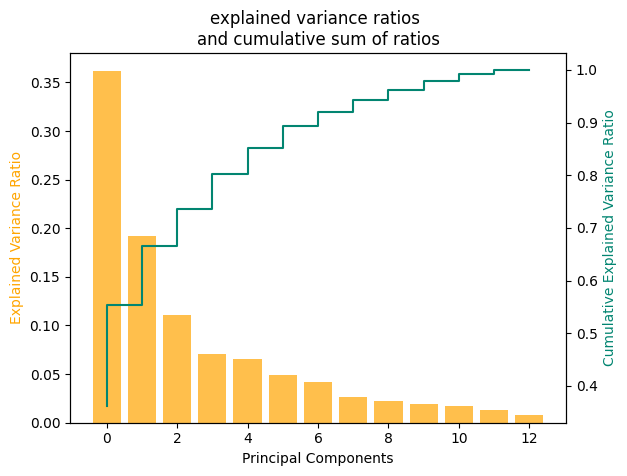

In [2]:
# Plot explained variance and cumulative sum of explained variance
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.7, color='orange')
ax2.step(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), c='#028571')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio', color='orange')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='#028571')
plt.title('explained variance ratios \nand cumulative sum of ratios')
plt.show()

## Loadings for the first principal component

The loadings for the first principal component (PC1) are the coefficients of the linear combination of the original variables that make up the first principal component. The loadings for PC1 are given by the eigenvector corresponding to the largest eigenvalue of the covariance matrix. This shows that PC1 is constructed as a weighted linear combination of the original variables. Here, we can inspect which original variables contribute most to the first principal component.

In [ ]:
# Computed the loadings of the first principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_pc1 = loadings[:, 0]

# Plot loadings in a bar plot
fig, ax = plt.subplots()
ax.barh(np.arange(len(loadings_pc1)), loadings_pc1)
ax.set_xlabel('Loadings for PC1')
plt.title('Loadings of the First Principal Component')
plt.yticks(np.arange(len(loadings_pc1)), datasets.load_wine().feature_names)
plt.show()
